# Source: https://learning.oreilly.com/library/view/python-data-science/9781098121211/ch45.html#ch_0509-principal-component-analysis_pca-as-dimensionality-reduction

In [3]:
!pip install numpy
pip install -U pip
!pip install matplotlib -q
!pip install scikit-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 2.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
print(matplotlib.__version__)


3.10.0


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


(np.float64(-2.7292712056271964),
 np.float64(2.5702744393352615),
 np.float64(-0.9326181575178751),
 np.float64(1.004413830229183))

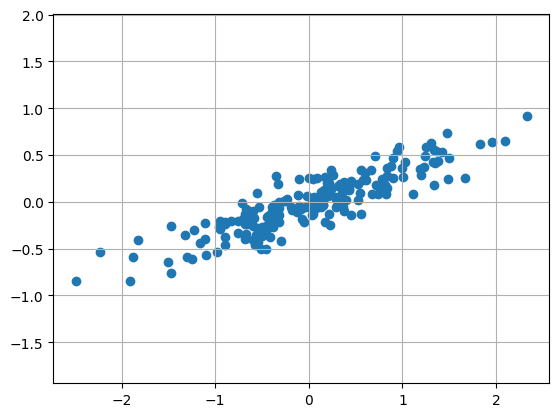

In [14]:
rng = np.random.RandomState(1)
plt.grid()
X=np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')



In [18]:
print(sklearn.__version__)

1.6.0


In [17]:
import sklearn

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [21]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [22]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


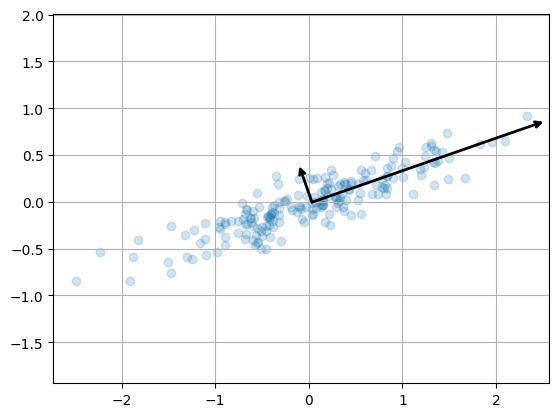

In [24]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

#Plotting data
plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.grid()

In [25]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


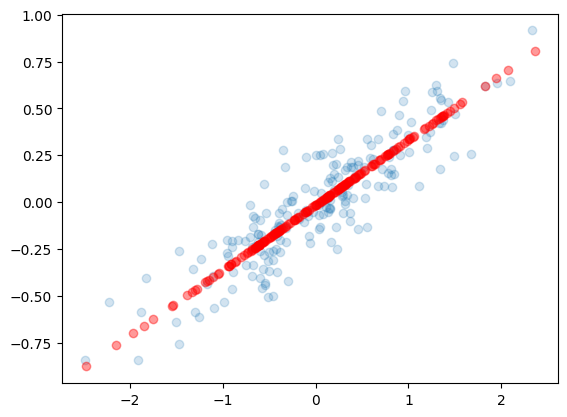

In [42]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.4, color='r')

In [35]:
help(plt.scatter)


Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, *, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, colorizer: 'Colorizer | None' = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcPa

In [36]:
plt.scatter?


Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    *,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    colorizer: 'Colorizer | None' = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rc

In [43]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [45]:
pca = PCA(2) #projecting from 64 dimension'd digits to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/tmp/ipykernel_337876/2310026786.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10));


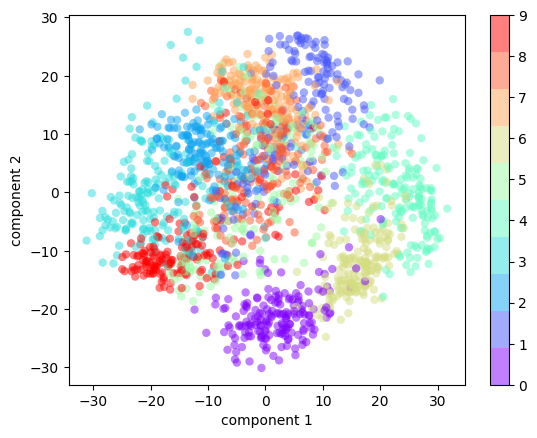

In [57]:
plt.scatter(projected[:,0], projected[:,1],
            c=digits.target,
            edgecolor='none',
            alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10));
plt.xlabel('component 1');
plt.ylabel('component 2');
plt.colorbar();

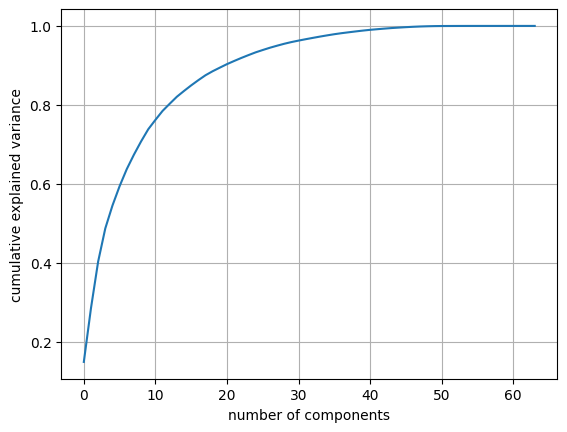

In [59]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [61]:
#The number of principal components to reach threshold of .75
pca = PCA(.75).fit(digits.data)
pca.n_components_

np.int64(11)

In [62]:
pca = PCA(0.9).fit(digits.data)
pca.n_components_

np.int64(21)

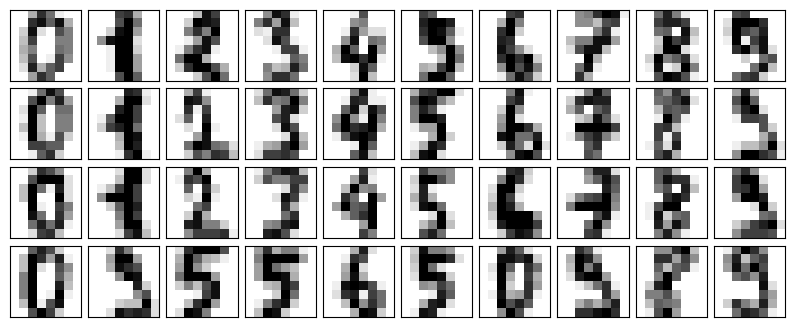

In [63]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap='binary', interpolation='nearest',
                  clim=(0,16))

plot_digits(digits.data)

In [64]:
rng = np.random.default_rng(42)
rng.normal(10,2)

10.609434159508863

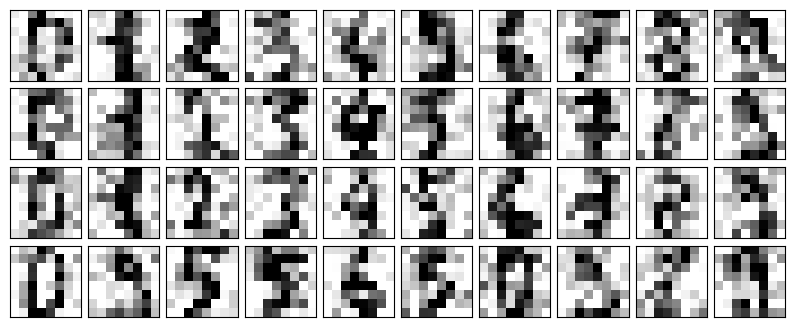

In [67]:
#Introduced noise to the digit dataset
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data,4)
plot_digits(noisy)

In [69]:
#50% of the variance amounts to 12 principal components, from 64 dimensions
pca = PCA(0.5).fit(noisy)
pca.n_components_

np.int64(12)

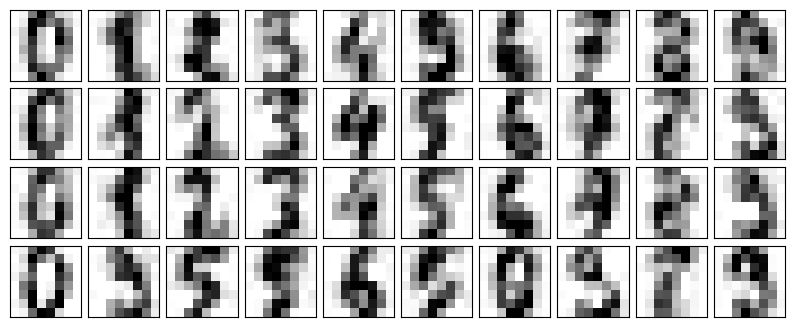

In [70]:
#Decreasing noise by transforming the data using PCA to 12 PCs.
#Inverse transforming, extracting only the relevant variances which theoretically should remove the noises which make up the PCs with lower variance explained ratio
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [73]:
from sklearn.datasets import fetch_lfw_people


In [74]:
#Download time ~ 8 mins
faces = fetch_lfw_people(min_faces_per_person=60)


In [75]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [ ]:
faces.head()

In [76]:
pca=PCA(150, svd_solver='randomized', random_state=42)
pca.fit(faces.data)

PCA(n_components=150, random_state=42, svd_solver='randomized')

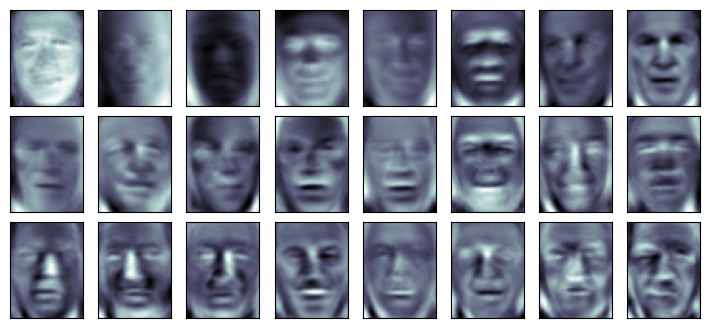

In [78]:
fig, axes = plt.subplots(3,8, figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

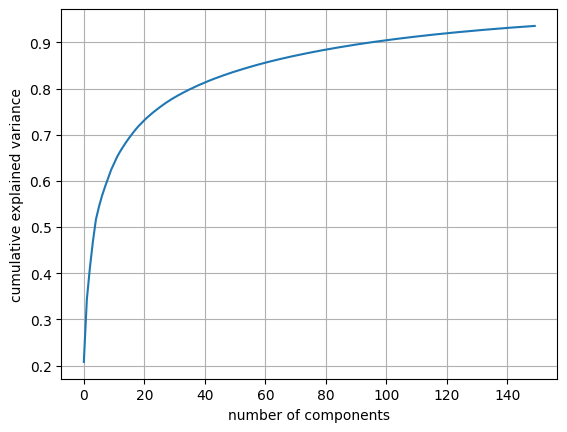

In [80]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [81]:
#Computing the components and projected faces
pca = pca.fit(faces.data)
components=pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

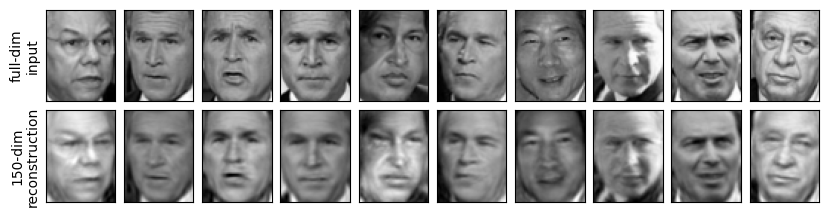

In [82]:
#Plotting the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47),cmap='binary_r')

ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')